In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('C:/Users/laphouse/Desktop/train.csv')
f_test=pd.read_csv('C:/Users/laphouse/Desktop/test.csv')


## EDA

In [3]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Display the statistical summary
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


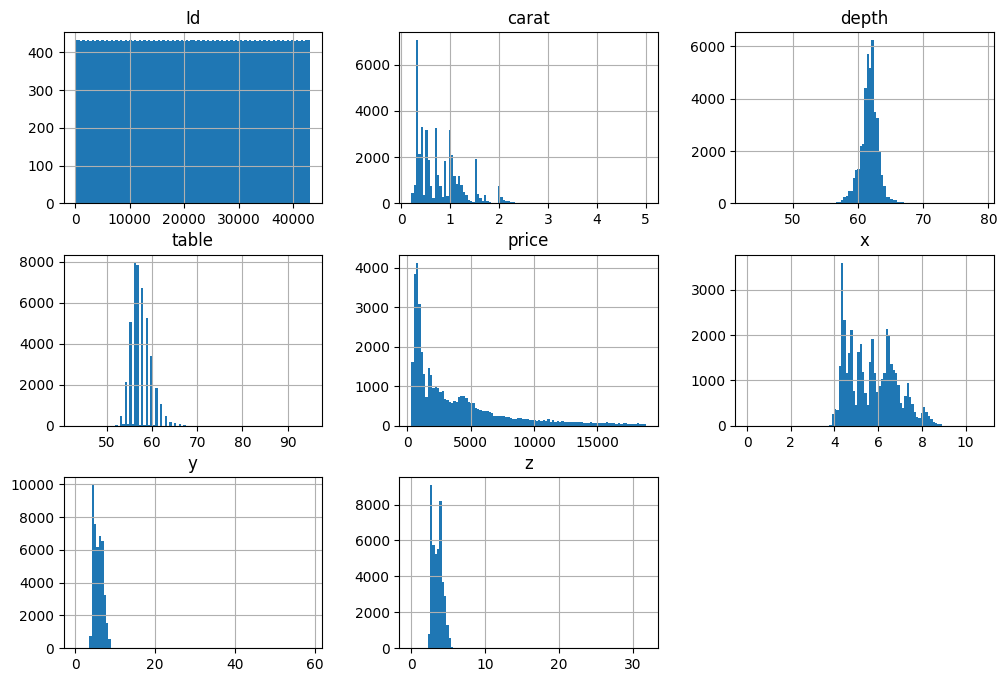

In [6]:
data.hist(bins=100, figsize=(12,8))
plt.show()

## looking for correlations

In [7]:
num_data = data.select_dtypes(include='number') #select only numbers
corr_mat= num_data.corr()

In [8]:
corr_mat["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

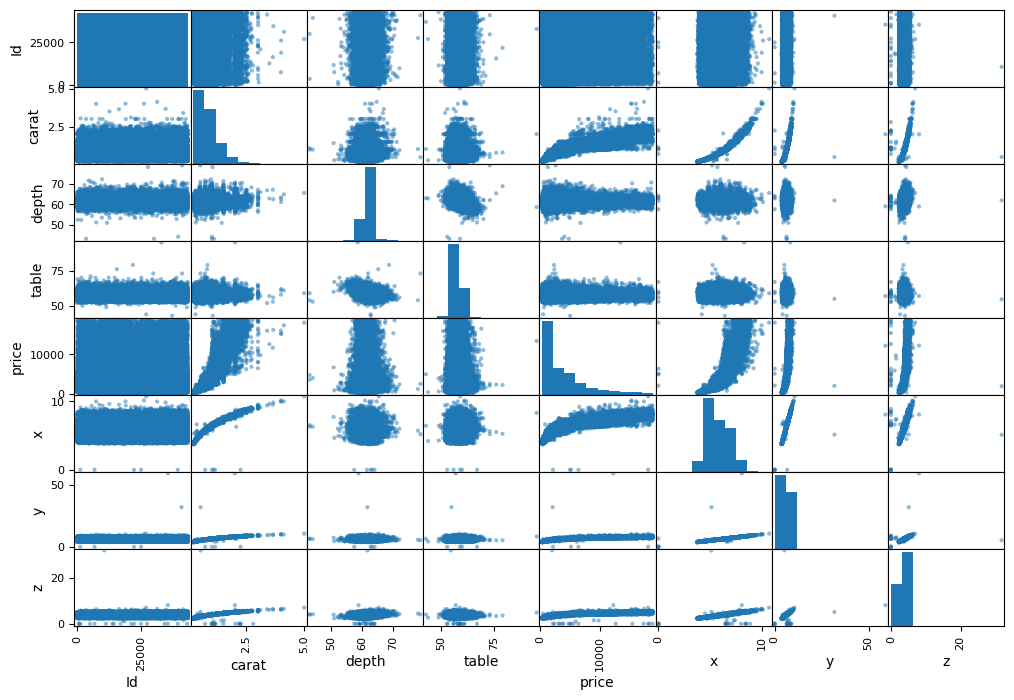

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(num_data, figsize=(12,8))
plt.show()

There is no correlation between dapth, table and price

There r some outliers in [x,y,z,carat]

# Attribute combintation

In [12]:
num_data['size']= data['x']* data['y']* data['z']


In [13]:
corr_mat= num_data.corr()
corr_mat["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
size     0.897903
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

## Data cleaning

In [14]:
# handle null and zero value
# It's unusual to find zero values in the x, y, and z columns
len(data[(data[['x','y','z']]==0).any(axis=1)]) # only 14, so we can remove them 
data= data[~(data[['x','y','z']]==0).any(axis=1)] 

In [15]:
data.drop(['table', 'depth','Id'], axis=1, inplace=True)

In [16]:
#Dropping the outliers 
data= data[(data['x']>2)]
data= data[(data['y']<25)]
data= data[(data['z']<25)]
data= data[(data['carat']<3)]

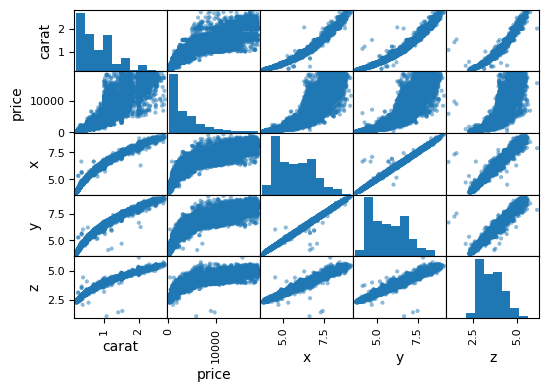

In [18]:
num_data = data.select_dtypes(include='number') #select only numbers
corr_mat= num_data.corr()
scatter_matrix(num_data, figsize=(6,4))
plt.show()

In [19]:
corr_mat= num_data.corr()
corr_mat["price"].sort_values(ascending=False)


price    1.000000
carat    0.923827
y        0.888619
x        0.886915
z        0.881940
Name: price, dtype: float64

## Handling Text and Categorical Attributes

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordered_cat= [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],['J', 'I', 'H', 'G', 'F', 'E', 'D'],
              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
encoder= OrdinalEncoder(categories=ordered_cat)
data_cat= data[['cut','color','clarity']]
enc_data= encoder.fit_transform(data_cat)
print(encoder.categories_)
enc_data[:5]


[array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]


array([[4., 1., 1.],
       [3., 3., 5.],
       [4., 4., 3.],
       [4., 3., 3.],
       [3., 2., 5.]])

In [21]:
data[['cut','color','clarity']]=enc_data

In [22]:
data.corr()

,carat,cut,color,clarity,price,x,y,z
carat,1.000000,-0.135442,-0.289307,-0.351148,0.923827,0.979094,0.978294,0.977486
cut,-0.135442,1.000000,0.020412,0.188883,-0.055032,-0.128362,-0.127982,-0.154271
color,-0.289307,0.020412,1.000000,-0.029089,-0.170084,-0.268028,-0.267783,-0.272305
clarity,-0.351148,0.188883,-0.029089,1.000000,-0.145212,-0.371873,-0.366353,-0.375119
price,0.923827,-0.055032,-0.170084,-0.145212,1.000000,0.886915,0.888619,0.881940
x,0.979094,-0.128362,-0.268028,-0.371873,0.886915,1.000000,0.998632,0.990934
y,0.978294,-0.127982,-0.267783,-0.366353,0.888619,0.998632,1.000000,0.990605
z,0.977486,-0.154271,-0.272305,-0.375119,0.881940,0.990934,0.990605,1.000000


<Axes: xlabel='price', ylabel='x'>

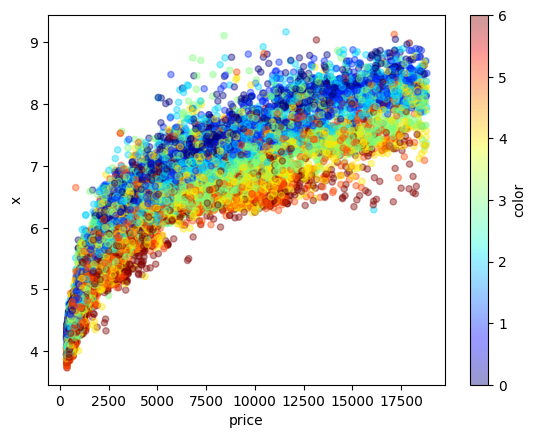

In [24]:
data.plot(kind='scatter',x='price',y='x',c='color', cmap="jet",alpha=0.4)

<Axes: xlabel='price', ylabel='x'>

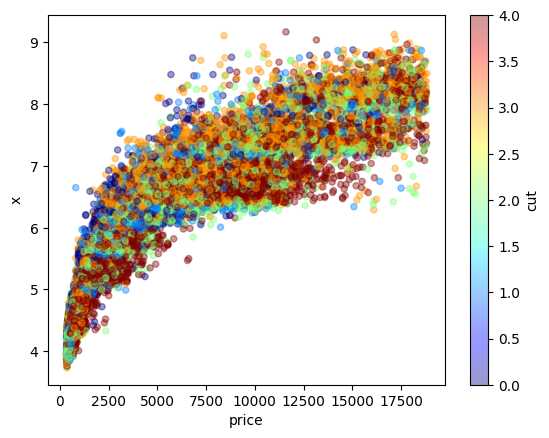

In [25]:
data.plot(kind='scatter',x='price',y='x',c='cut', cmap="jet",alpha=0.4) # low correlations

In [26]:
data.drop(['cut'], axis=1, inplace=True)

<Axes: xlabel='price', ylabel='x'>

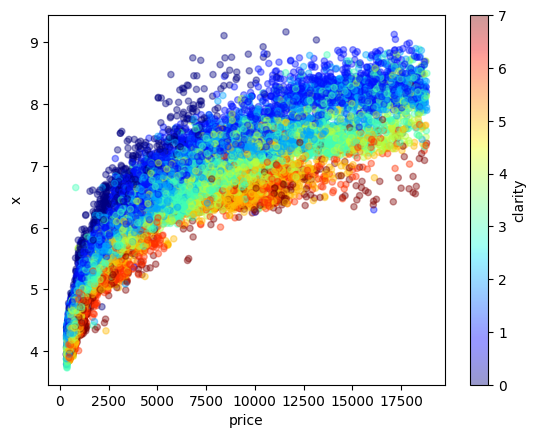

In [27]:
data.plot(kind='scatter',x='price',y='x',c='clarity', cmap="jet",alpha=0.4)

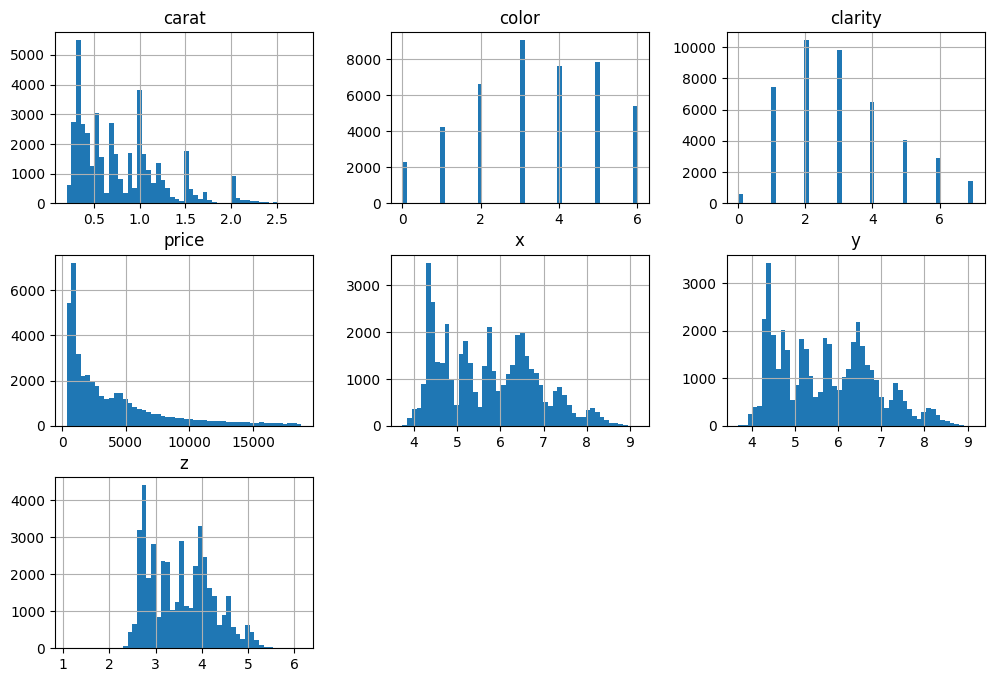

In [28]:
data.hist(bins=50, figsize=(12,8))
plt.show()

# Model Building

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
f_data=data.copy()
X = f_data.drop(columns=['price'])  # Features
y = f_data[['price']]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [32]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [33]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1172.731828 
DecisionTree: -747.127992 


C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\pipeline.py:394: DataCo

RandomForest: -561.511790 
KNeighbors: -584.578654 
XGBRegressor: -555.908266 


In [64]:
pred = pipeline_xgb.predict(X_test)

In [65]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9807976206532426
Adjusted R^2: 0.9807708515370529
MAE: 280.61244402349865
MSE: 301239.9533106816
RMSE: 548.8533076430182


## Hyperparameters Fine-Tuning

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Feature Scaling
pipeline_lr = Pipeline([("scaler", MinMaxScaler()), ("lr", LinearRegression())])
pipeline_dt = Pipeline([("scaler", MinMaxScaler()), ("dt", DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestRegressor())])
pipeline_kn = Pipeline([("scaler", MinMaxScaler()), ("kn", KNeighborsRegressor())])
pipeline_xgb = Pipeline([("scaler", MinMaxScaler()), ("xgb", XGBRegressor())])


In [36]:
from scipy.stats import uniform, randint

param_dist = {
    'xgb__n_estimators': randint(50, 300),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__max_depth': randint(3, 10),
    'xgb__colsample_bytree': uniform(0.3, 0.7),
    'xgb__subsample': uniform(0.3, 0.7)
}



In [37]:
random_search = RandomizedSearchCV(pipeline_xgb, param_dist, n_iter=100, cv=5,
                                   scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
pred = best_model.predict(X_test)




In [38]:
# Reevaluating the model after the optimization process
print("Best Model Parameters:", random_search.best_params_)
print("R^2:", metrics.r2_score(y_test, pred))
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Best Model Parameters: {'xgb__colsample_bytree': 0.8940688564472721, 'xgb__learning_rate': 0.037324266288405766, 'xgb__max_depth': 8, 'xgb__n_estimators': 225, 'xgb__subsample': 0.6869739838355353}
R^2: 0.9824306314787927
Adjusted R^2: 0.9824061388646832
MAE: 271.5592713450036
MSE: 275621.872553017
RMSE: 524.9970214706146
